In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import pandas as pd
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv('C:/Users/samru/Downloads/using rnn/labeled_data.csv',delimiter=',')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [42]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [43]:
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()

0

In [9]:
df.isna().sum()

hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

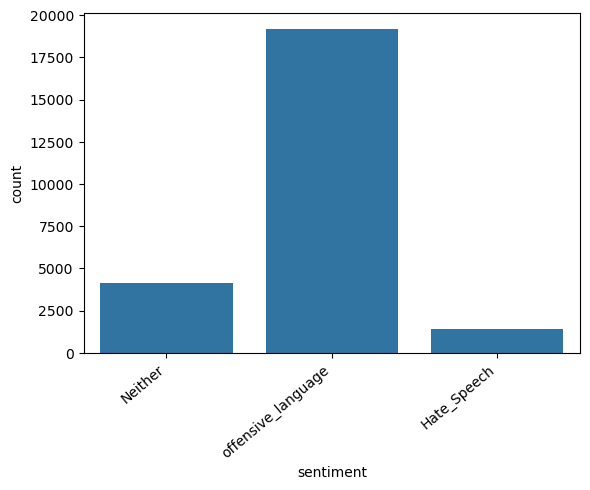

In [10]:
df['sentiment'] = df['class'].map({0:'Hate_Speech',1:'offensive_language',
                                  2: 'Neither'})


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

In [11]:
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('<.*?>+', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('rt', '',text)
    text = re.sub('\d', '',text)
    text = re.sub('\w*\d\w*', '', text)
    
    text = re.sub('  ',' ',text)
    

    
    return text


df['tweet'] = df['tweet'].apply(clean_text)
df['tweet'].head(10)

0     mayasolovely as a woman you shouldnt complain...
1     mleew boy dats coldtyga dwn bad for cuffin da...
2     urkindofbrand dawg sbabylife you ever fuck a ...
3          cganderson vivabased she look like a tranny
4     shenikarobes the shit you hear about me might...
5    tmadisonx the shit just blows meclaim you so f...
6    brighterdays i can not just sit up and hate on...
7    selfiequeenbri cause im tired of you big bitch...
8     amp you might not get ya bitch back amp thats...
9     rhythmixx hobbies include fighting mariam\n\n...
Name: tweet, dtype: object

In [29]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['tweet'] = df['tweet'].apply(remove_stopwords)
df['tweet'].head(10)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\samru/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\samru\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
text = " ".join(i for i in df['tweet'])

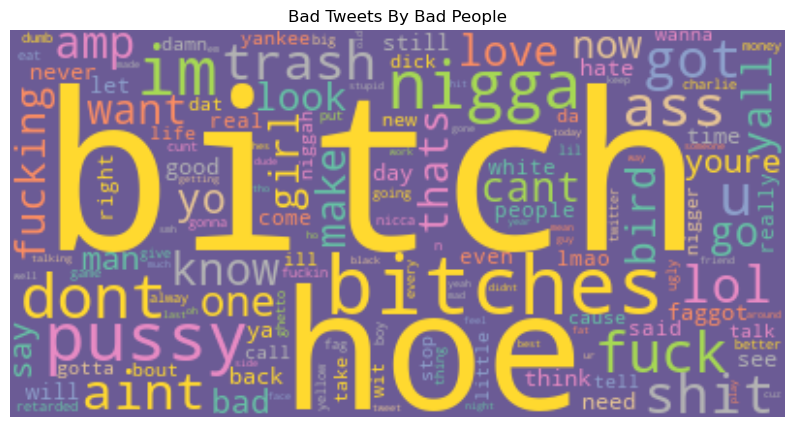

In [30]:
from wordcloud import WordCloud


wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People")
plt.show()

In [31]:
print(text.count("bitch"))
print(text.count("bitches"))
print(text.count("nigga"))
print(text.count("niggas"))
print(text.count("hoe"))
print(text.count("trash"))
print(text.count("pussy"))
print(text.count("fuck"))
print(text.count("fucking"))
print(text.count("love"))
print(text.count("faggot"))

11597
3135
2489
817
4561
1188
2185
2754
654
951
547


In [32]:
Hate_tweet = (df['sentiment'] == "Hate_Speech").astype('int32')


neither = (df['sentiment'] == "Neither").astype('int32')

sns.countplot(x=neither)
plt.show()

KeyError: 'sentiment'

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.xticks()
plt.show()

In [ ]:
df['length_of_hate'] = df['tweet'].apply(len)

sns.histplot(x='length_of_hate',hue='sentiment',data=df)
plt.title('Histogram of hateful tweets and just degeneracy')
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use TfidfVectorizer for memory efficiency
cv = TfidfVectorizer(max_features=10000, min_df=5)
X = cv.fit_transform(df['tweet'])  # Keep as sparse matrix
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Models
lr = LogisticRegression(max_iter=1000)
PA = PassiveAggressiveClassifier()
MNB = MultinomialNB()
BNB = BernoulliNB()

# Evaluation function
def evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    clf_rpt = classification_report(y_test, pred)
    print(f'{model.__class__.__name__} -- Accuracy: {acc*100:.2f}%\n{clf_rpt}')
    return pred

# Evaluate models
lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)
BNB_pred = evaluate_model(X_train, X_test, y_train, y_test, BNB)


LogisticRegression -- Accuracy: 89.21%
              precision    recall  f1-score   support

           0       0.53      0.16      0.24       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.81      0.83       835

    accuracy                           0.89      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957

PassiveAggressiveClassifier -- Accuracy: 86.00%
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       290
           1       0.91      0.92      0.92      3832
           2       0.78      0.77      0.77       835

    accuracy                           0.86      4957
   macro avg       0.68      0.67      0.67      4957
weighted avg       0.86      0.86      0.86      4957

MultinomialNB -- Accuracy: 82.73%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
        

In [34]:
X = df['tweet']
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding, Dense,SpatialDropout1D,Bidirectional
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [35]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)

78


In [36]:
from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_length,padding='post')
X_test = pad_sequences(X_test,maxlen=max_length,padding='post')

In [37]:
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=25, input_length=25))
RNN.add(SpatialDropout1D(0.2))
RNN.add(Bidirectional(LSTM(25, dropout=0.2,recurrent_dropout=0.2)))
RNN.add(Dense(3, activation='sigmoid'))
RNN.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size = 64

history = RNN.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_split=0.1)
results = RNN.evaluate(X_test,y_test)
pred = RNN.predict(X_test)
print(results)
print("Max Accuracy: ",max(history.history['accuracy']))
print("Max vallidation accuracy: ",max(history.history['val_accuracy']))


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 75s 172ms/step - accuracy: 0.7774 - loss: 0.6701 - val_accuracy: 0.8961 - val_loss: 0.3315
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 49s 164ms/step - accuracy: 0.8976 - loss: 0.3232 - val_accuracy: 0.9093 - val_loss: 0.2990
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 157ms/step - accuracy: 0.9201 - loss: 0.2529 - val_accuracy: 0.9060 - val_loss: 0.3082
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 83s 159ms/step - accuracy: 0.9292 - loss: 0.2111 - val_accuracy: 0.8965 - val_loss: 0.3373
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 80s 151ms/step - accuracy: 0.9410 - loss: 0.1774 - val_accuracy: 0.8927 - val_loss: 0.3788
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 46s 154ms/step - accuracy: 0.9550 - loss: 0.1396 - val_accuracy: 0.8866 - val_loss: 0.3878
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 152ms/step - accuracy: 0.9688 - loss: 0.1046 - val_accuracy: 0.8842 - val_loss: 0.4411
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - accuracy: 0.9770 - loss: 0

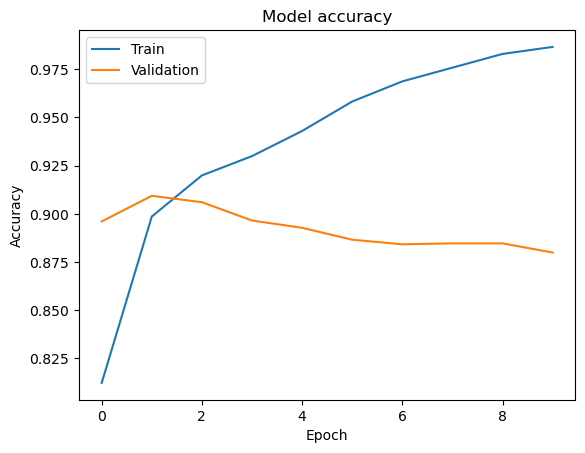

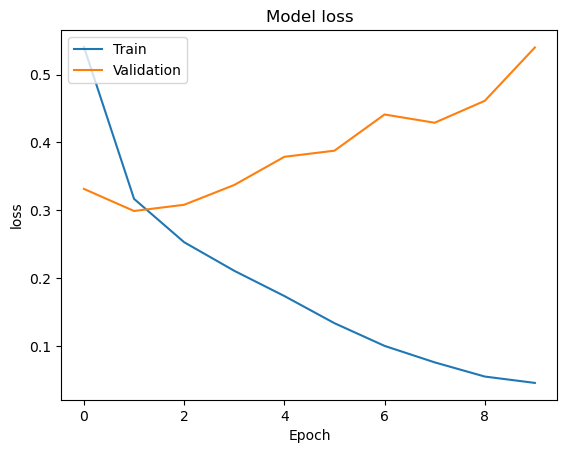

In [38]:
#training and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#training and evaluation resluts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()